**什么是神经网络**

感知机需要人工设置权重，但是，神经网络可以自动地从数据中学习到合适的权重参数。一个神经网络的示例如下图所示。左边一列为**输入层**，中间为**中间层**，右边为**输出层**。
![](../img/NN.png)
上图的神经网络一共由三层神经元组成，但是实质上只有2层神经元有权重（输入层没有），因此将其称为“2层网络”。

**感知机中偏置值的表示**

添加bias的输入信号为1，感知机y就会计算$w_1*x_1+w_2*x_2+b$
![](../img/biasre.png)
数学式表示为
$$
    y=
    \begin{cases}
    1, & w_1x_1+w_2x_2+b \ge 0\\
    0, & w_1x_1+w_2x_2+b < 0
    \end{cases}
$$

简化表示为：
$$
    y = h(w_1x_1+w_2x_2+b)
$$

$$
    h(x)=
    \begin{cases}
    1, & x \ge 0\\
    0, & x < 0 
    \end{cases}
$$

## 激活函数（activation function）

刚才登场的$h(x)$函数会将输入信号的总和转换为输出信号，这种函数一般称为激活函数。激活函数的作用在于决定如何来激活输入信号的总和。
上述的激活函数以阈值为界，一旦输入超过阈值，就切换输出，这类函数叫“阶跃函数”。

### sigmoid函数
神经网络中经常使用的一个函数为sigmoid函数：
$$
    h(x) = \frac{1}{1+e^{-x}}
$$
sigmoid函数图像：
![](https://img-blog.csdn.net/20170226222316999?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvc2FsdHJpdmVy/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)

In [17]:
import numpy as np

def step_function(x): # 阶跃函数
    return np.array(x>0, dtype = np.int)

In [18]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

In [19]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [20]:
y = x > 0
y

array([False,  True,  True])

In [21]:
y.dtype

dtype('bool')

In [22]:
y.astype(int)

array([0, 1, 1])

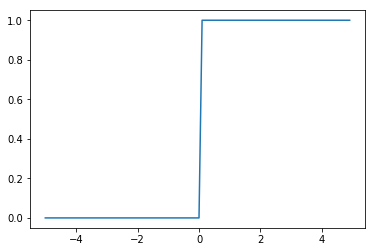

In [25]:
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

In [37]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [40]:
sigmoid(np.array([-5.0, 1.0, 2.0]))

array([0.00669285, 0.73105858, 0.88079708])

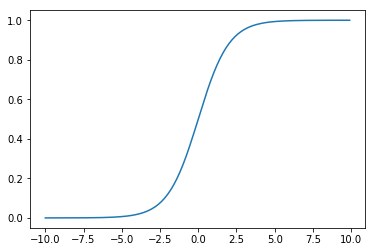

In [41]:
x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

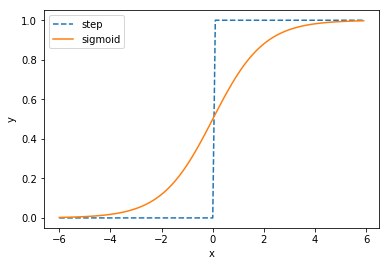

In [46]:
# 对比阶跃函数与sigmoid
x = np.arange(-6.0, 6.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, ls = "--", label = "step")
plt.plot(x, y2, label = "sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


通过对比可以发现，sigmoid函数输出的是连续数值，而阶跃函数只能输出0-1离散数值。可见，在神经网络中，流动的是连续数值信号。

sigmoid与阶跃函数的共同点在于：
1. 实际上，两者的结构均是“输入小时，输出接近0（为0）；随着输入增大，输出向1 靠近（变成1）”。也就是说，当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值。
2. 不管输入信号有多小，或者有多大，输出信号的值都在0 到1 之间。
3. 都是非线性函数

### ReLU
ReLU函数在输入大于0时，直接输出该值；在输出小于0时，输出0：
$$
    h(x)=
    \begin{cases}
    x, & x \ge 0\\
    0, & x < 0
    \end{cases}
$$

In [47]:
def ReLU(x): # ReLU函数
    return np.maximum(0, x)

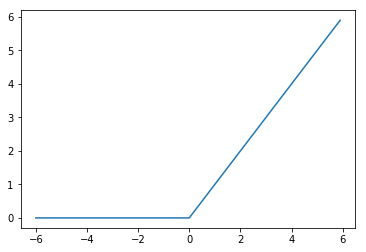

In [48]:
x = np.arange(-6.0, 6.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.show()

## 多维数组运算
二维数组成为矩阵（matrix），横向排列为行（row），纵向排列为列（column）

### 矩阵乘法
有两个矩阵$A$，$B$，$A$的第1行和$B$的第1列的乘积结果是新数组的第1行第1列的元素，$A$的第2行和$B$的第1列的结果是新数组的第2行第1列的元素。
矩阵乘法需要注意两个矩阵的形状：**矩阵$A$的第1维的元素个数（列数）必须和矩阵$B$的第0维的元素个数（行数）相等**
![](../img/dot.png)

In [49]:
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [51]:
np.ndim(A)

1

In [52]:
A.shape

(4,)

In [53]:
A.shape[0]

4

In [55]:
B=np.array([[1,2],[3,4],[5,6]])
print(B, np.ndim(B), B.shape)

[[1 2]
 [3 4]
 [5 6]] 2 (3, 2)


In [56]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [58]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
np.dot(X, W)

array([ 5, 11, 17])